In [ ]:
# import necessary libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# importing sys
import sys

In [ ]:
# reading spotify file
data_file = "Spotify-2000.csv"
df_spotify = pd.read_csv(data_file)
df_spotify.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
df_spotify.rename(columns=lambda x: x.strip().replace(" ", "_").replace('(', '').replace(')', '').lower(), inplace=True)

In [ ]:
df_spotify.top_genre = df_spotify.top_genre.str.split().str[-1]

In [ ]:
df_spotify.length_duration = df_spotify.length_duration.str.replace(',', '').astype(int)

In [ ]:
df_spotify.top_genre.value_counts().head(10)

rock         856
pop          333
standards    123
metal         93
indie         77
cabaret       51
soul          45
wave          38
invasion      36
hop           29
Name: top_genre, dtype: int64

In [ ]:
df_spotify_clean = df_spotify[df_spotify.top_genre.isin(['rock','pop','standards','metal','indie','cabaret'])]

In [ ]:
df_spotify_clean.drop(columns = ['index','title', 'artist', 'year'], inplace = True)

<ipython-input-11-40df79aff285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify_clean.drop(columns = ['index','title', 'artist', 'year'], inplace = True)


In [ ]:
df_spotify_clean.head()

,top_genre,beats_per_minute_bpm,energy,danceability,loudness_db,liveness,valence,length_duration,acousticness,speechiness,popularity
0,standards,157,30,53,-14,11,68,201,94,3,71
1,rock,135,79,50,-11,17,81,207,17,7,39
3,metal,173,96,43,-4,3,37,269,0,4,76
4,rock,106,82,58,-5,10,87,256,1,3,59
5,rock,99,46,54,-9,14,14,247,0,2,45


<ipython-input-13-0b68d31fb973>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_spotify_clean.corr(), annot=True, cmap='RdYlGn')


<Axes: >

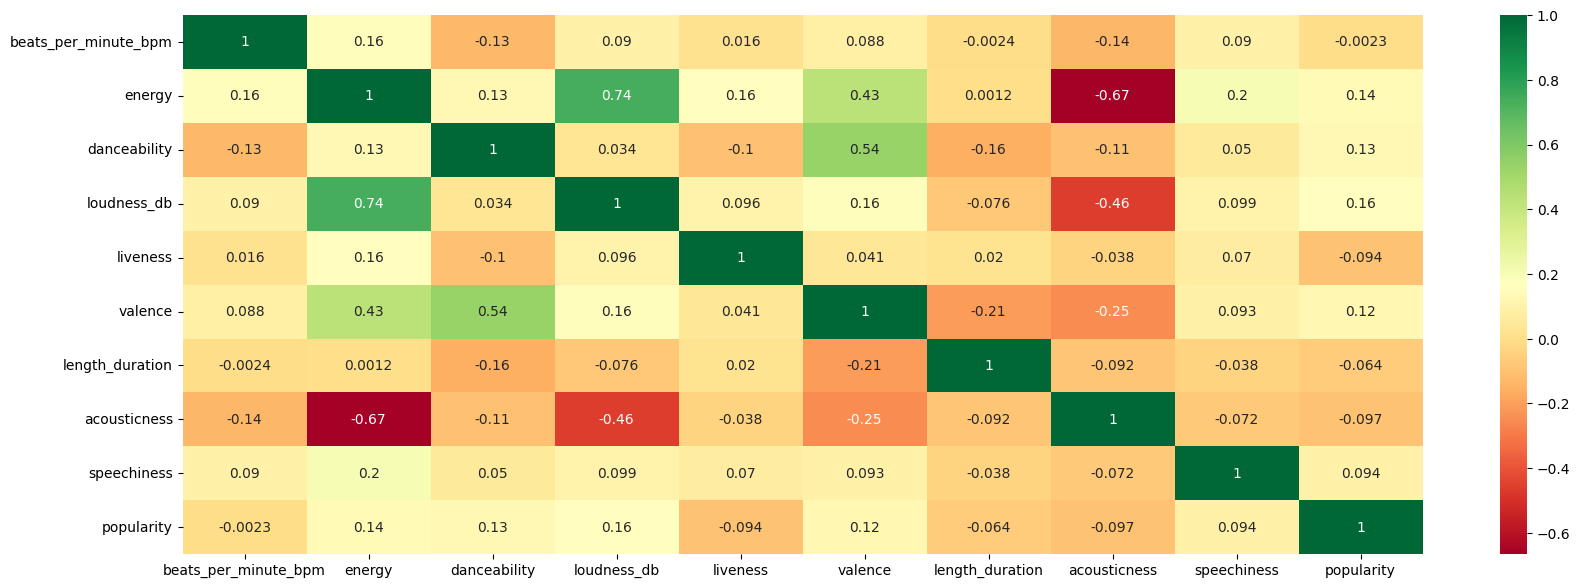

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df_spotify_clean.corr(), annot=True, cmap='RdYlGn')

In [ ]:
train, test = train_test_split(df_spotify_clean, test_size = 0.2, random_state = 1)
# training set
x_train = train.values[:,1:]
y_train = train.values[:,0]

# test set
x_test = test.values[:,1:]
y_test = test.values[:,0]

In [ ]:
standard_scaler = StandardScaler().fit(x_train)

# Standard Scaler
x_train_SS = standard_scaler.transform(x_train)
x_test_SS = standard_scaler.transform(x_test)

Baseline

In [ ]:
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(len(y_test), sum(1 if i == 'rock' else 0 for i in y_test),
                                                     1.0*sum(1 if i == 'rock' else 0 for i in y_test)/len(y_test)))

total: 307  correct: 179  accuracy: 0.58


Logistic Regression

In [ ]:
classifier = LogisticRegression(solver='lbfgs', multi_class='auto')
classifier.fit(x_train_SS, y_train)

LogisticRegression()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
# Predict probabilities
probs_y=classifier.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(conf_matrix)

Accuracy: 0.40716612377850164
Recall: 0.40716612377850164
Precision: 0.32617742470344246
[[  0   0   1   0   6   0]
 [  0   0   1   0  16   0]
 [  0   0  17   0   2   0]
 [  0   0  17   0  49   0]
 [  0   0  71   0 108   0]
 [  0   0   1   0  18   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Nearest Neighbour

In [ ]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

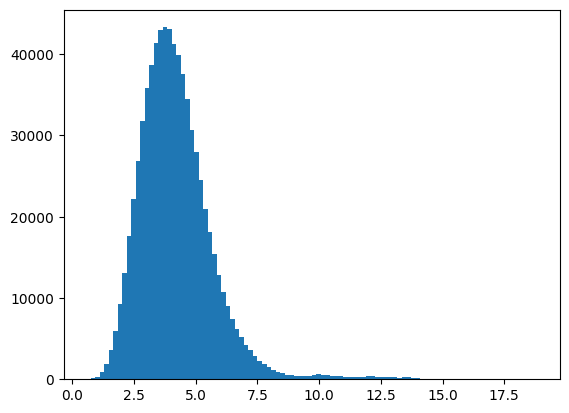

In [ ]:
dists = []
for i in range(len(x_train_SS) - 1):
    for j in range(i + 1, len(x_train_SS)):
        dist = EuclideanDistance(x_train_SS[i], x_train_SS[j])
        dists.append(dist)

fig = plt.hist(dists, 100)

In [ ]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric

    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels

    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results

    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

In [ ]:
clf = NearestNeighbors()
clf.fit(x_train_SS, y_train)
preds = clf.predict(x_test_SS)

correct, total = 0, 0
for pred, label in zip(preds, y_test):
    if pred == label: correct += 1
    total += 1
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total: 307  correct: 154  accuracy: 0.50


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

unique = np.unique(y_train)

y_test_1hot = label_binarize(y_test, classes = unique)
y_train_1hot = label_binarize(y_train, classes = unique)

# labelling
y_test_label = LabelEncoder()

In [ ]:
from sklearn.model_selection import cross_val_score

RF_cross_val_score = cross_val_score(rand_forest, x_train_SS, y_train_1hot, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

Random Forest: 0.395675 (0.047295)


Neural Net